In [2]:
import numpy as np
from itertools import combinations
from scipy.special import comb
import matplotlib.pyplot as plt

In [3]:
def p(k, M, s=5, d=100):
    return 1 - (1 - comb(d-s, k-s)/comb(d, k)) ** M

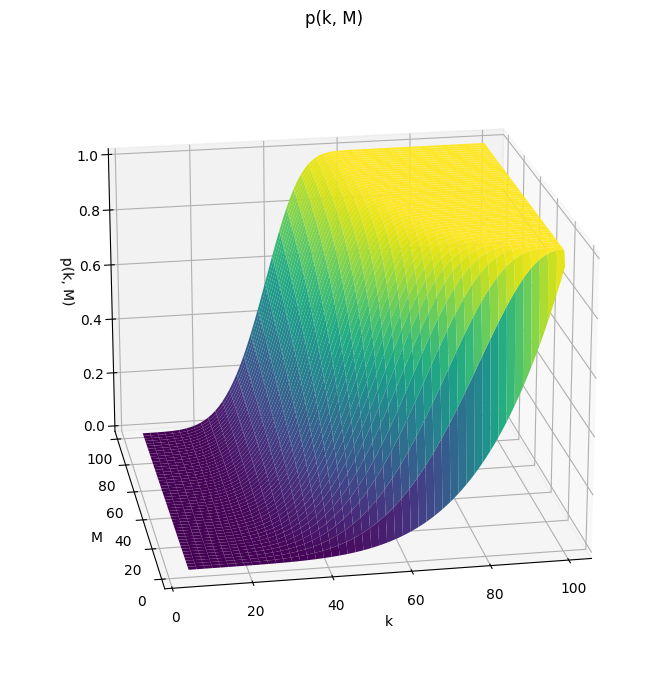

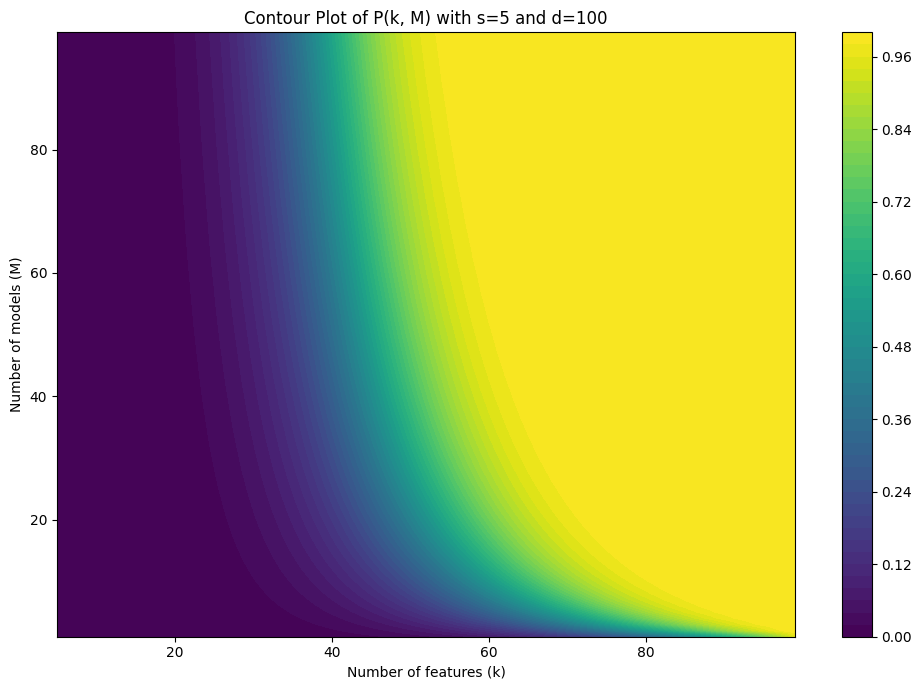

In [4]:
k_vals = np.arange(5, 100) 
M_vals = np.arange(1, 100)
k_grid, M_grid = np.meshgrid(k_vals, M_vals)

p_vals = p(k_grid, M_grid)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k_grid, M_grid, p_vals, cmap='viridis')

ax.view_init(elev=20, azim=-100)
ax.set_xlabel('k')
ax.set_ylabel('M')
ax.set_zlabel('p(k, M)')
ax.set_title('p(k, M)')

plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(10, 7))
contour = ax2.contourf(k_grid, M_grid, p_vals, levels=60, cmap='viridis')
cbar = fig2.colorbar(contour)
ax2.set_xlabel('Number of features (k)')
ax2.set_ylabel('Number of models (M)')
ax2.set_title('Contour Plot of P(k, M) with s=5 and d=100')
plt.tight_layout()
plt.show()

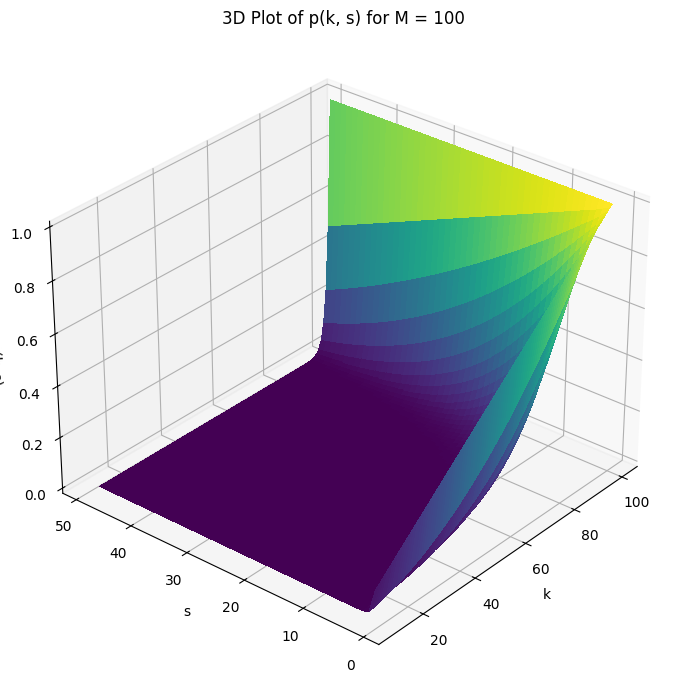

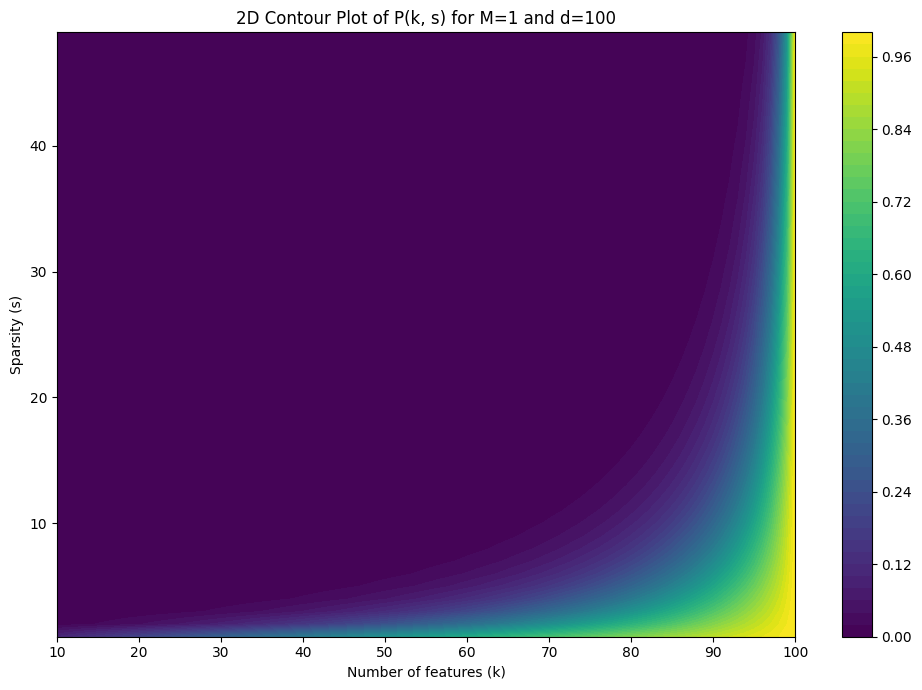

In [28]:
M = 1

k_vals = np.arange(10, 101)
s_vals = np.arange(1, 50)
k_grid, s_grid = np.meshgrid(k_vals, s_vals)

p_vals = p(k_grid, M, s_grid)
p_vals = np.nan_to_num(p_vals, nan=0.0)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(k_grid, s_grid, p_vals, cmap='viridis', rstride=1, cstride=1, antialiased=False)

ax.set_xlabel('k')
ax.set_ylabel('s')
ax.set_zlabel('p(k, s)')
ax.set_title('3D Plot of p(k, s) for M = 100')

ax.view_init(elev=30, azim=-140)
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(10, 7))
contour = ax2.contourf(k_grid, s_grid, p_vals, levels=60, cmap='viridis')
cbar = fig2.colorbar(contour)
ax2.set_xlabel('Number of features (k)')
ax2.set_ylabel('Sparsity (s)')
ax2.set_title('2D Contour Plot of P(k, s) for M=1 and d=100')
plt.tight_layout()
plt.show()

/tmp/ipykernel_11610/653726905.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


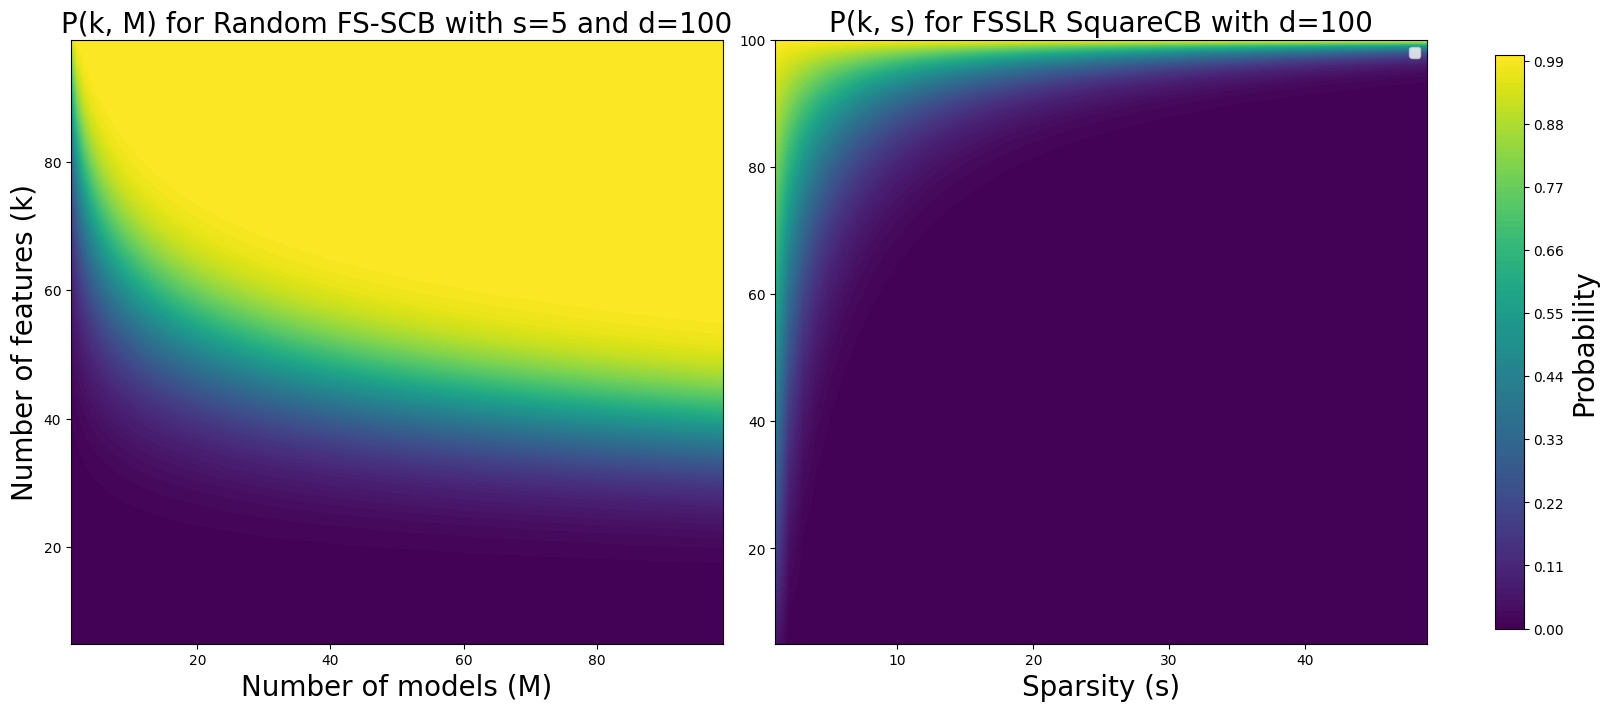

In [7]:
levels = 120
fontsize = 20
M = 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), constrained_layout=True)

k_vals = np.arange(5, 100) 
M_vals = np.arange(1, 100)
k_grid, M_grid = np.meshgrid(k_vals, M_vals)

p_vals = p(k_grid, M_grid)

contour2 = ax1.contourf(M_grid, k_grid, p_vals, levels=levels, cmap='viridis')
ax1.set_ylabel('Number of features (k)', fontsize=fontsize)
ax1.set_xlabel('Number of models (M)', fontsize=fontsize)
ax1.set_title('P(k, M) for Random FS-SCB with s=5 and d=100', fontsize=fontsize)

k_vals = np.arange(5, 101)
s_vals = np.arange(1, 50)
k_grid, s_grid = np.meshgrid(k_vals, s_vals)

p_vals = p(k_grid, M, s_grid)
p_vals = np.nan_to_num(p_vals, nan=0.0)

contour1 = ax2.contourf(s_grid, k_grid, p_vals, levels=levels, cmap='viridis')
# ax2.set_ylabel('Number of features (k)', fontsize=fontsize)
ax2.legend()

ax2.set_xlabel('Sparsity (s)', fontsize=fontsize)
ax2.set_title(f'P(k, s) for FSSLR SquareCB with d=100', fontsize=fontsize)
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation='vertical', shrink=0.95)
cbar.set_label('Probability', fontsize=fontsize)

plt.show()
